Patil, Yash/ Final Project:Data Bootcamp / Professor Backus / 05.05.2016

OBJECTIVE: This project will address the relation between livestock production (beef in this example) and total CO2 emissions. This project tries to find a relation, or lack of, between the two variables. In summation we will see the relation of magnitude of such production (livestock) and the total emissions of a country(that contriubute to global warming).

DATA REPORT:
Data was accessed from various sources including World Bank, FAOSTAT, etc. To access the information, certain parameters such as skipcolumns and na_values were required. For simplicity and clarity, we renamed columns and labels and created dataframes with the relvant data. Although all the datasets include the same list of countries, the order is different. To consolidate the information, merge methods must be used to correctly aquire the data. Many countries are too small to report an actual number or the data is simply unavailable, nevertheless na-values must be cleaned to avoid errors. The effect of na-values on the model was neutralized by multiplying Population and Per Capita Emissions to get to Total Emissions. This creates a value of 0 for size for the respective bubbles that have na-values, removing them from the model. Finally, only those countries with accurate data remain in the model. An additional note: Beef Production statistics were used as this is one of the most traded livestock or agriculture product, and also has the reputation for adding to greenhouse gases more than other livestock. Knowing this, the same results can be achieved using different livestock products like chicken, goat or fish, except some countries that do not actively produce or trade this product may be excluded or misrepresented.

Select Data Samples:
              Emissions Per Capita      Beef  Population  Total Emissions
Country Name                                                             
Aruba                          NaN       NaN    101936.0              NaN
Andorra                        NaN       NaN     82326.0              NaN
Afghanistan               0.425262  138000.0  28809167.0       12251447.0
                  Emissions Per Capita      Beef  Population  Total Emissions
Country Name                                                                 
Congo, Dem. Rep.                   NaN       NaN  68087376.0              NaN
Zambia                        0.212450  153970.0  14343526.0        3047277.0
Zimbabwe                      0.691698  101920.0  14255592.0        9860563.0
Beef Production Statistics: 0.25      7950.00
0.50     55395.50
0.75    198532.75
Name: Beef, dtype: float64


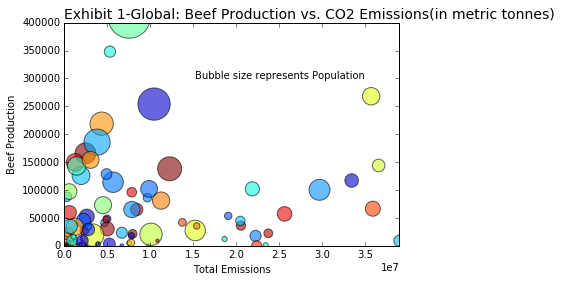

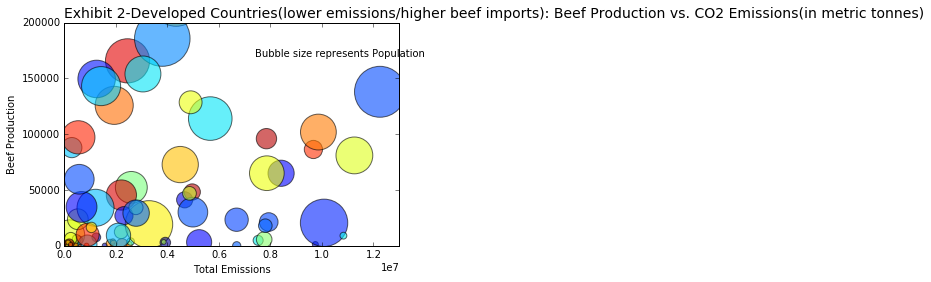

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Thu Apr 21 20:05:18 2016

@author: Yash
"""

import pandas as df
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
path='C://Users//Yash//data.DataBoot//BeefStats1.csv'##please download this file from http://faostat3.fao.org/download/Q/QL/E. Select ALL Countries, 
##Items Aggregated :Beef and Buffalo Meat + (Total) and selct year 2011.Download the cvs file and paste the location here.
x1=df.read_csv(path,usecols={3,9},na_values="")
x1=x1.set_index("AreaName")
beef=df.DataFrame(x1["Value"])
path1='http://api.worldbank.org/v2/en/indicator/sp.pop.totl?downloadformat=excel'
y=df.read_excel(path1,skiprows=3,sheetname='Data',na_values="")
pop=y.set_index("Country Name")
pop=df.DataFrame(pop["2011"])
path2='http://api.worldbank.org/v2/en/indicator/en.atm.co2e.pc?downloadformat=excel'
y2=df.read_excel(path2,skiprows=3,sheetname='Data',na_values="")
y2=y2.set_index("Country Name")
em=df.DataFrame(y2["2011"])
real=df.merge(em,beef,how='right',right_index=True, left_index=True)
real1=df.merge(real,pop,how='right',right_index=True, left_index=True)
real1.columns=['Emissions Per Capita','Beef','Population']
real1['Total Emissions']=real1['Emissions Per Capita']*real1['Population']
print("Select Data Samples:",sep='\t')
print(real1.head(n=3))
print(real1.tail(n=3))
area=np.pi*(0.000001*real1['Population'])    ##size of bubble is level of consumption
fig, ax = plt.subplots()
ax.scatter(real1['Total Emissions'],real1['Beef'],alpha=0.6, s=(0.00002*real1['Population']),c=np.random.rand(248))
ax.set_ylabel('Beef Production')
ax.set_xlabel('Total Emissions')
ax.text(35000000,300000, 'Bubble size represents Population',horizontalalignment='right')
ax.set_ylim(1,400000)
ax.set_xlim(1,39000000)
print("Beef Production Statistics:",real1['Beef'].quantile(q=[0.25, 0.5, 0.75]))
ax.set_title('Exhibit 1-Global: Beef Production vs. CO2 Emissions(in metric tonnes)', loc='left', fontsize=14)
fig, ax = plt.subplots()
ax.scatter(real1['Total Emissions'],real1['Beef'],alpha=0.6, s=(0.00009*real1['Population']),c=np.random.rand(248))
ax.set_ylabel('Beef Production')
ax.set_xlabel('Total Emissions')
ax.text(14000000,170000, 'Bubble size represents Population',horizontalalignment='right')
ax.set_ylim(1,200000)
ax.set_xlim(1,13000000)
ax.set_title('Exhibit 2-Developed Countries(lower emissions/higher beef imports): Beef Production vs. CO2 Emissions(in metric tonnes)', loc='left', fontsize=14)

Exhibit 1 shows a weak corellation (above or close to 0) between emissions produced and beef production by country. This correlation (or lack of) is more evident when observing similar trends in developed countries (with lower emissions due to developement factors and lower production due to higher imports) due to considerably less exogenous variables, as seen in Exhibit 2. Population is also correlated to emissions and beef production, but this is to be expected as consumption and production generally increase with a growing population in a healthy eceonomy. Our conclusion is that production of livestock and related agricultural production related emissions in developing countries are nowhere close in magnitude to the emissions from other sources from more developed and industrialized countries, which are the prime cause of global warming and drasticly changing climate. This is helpful to note that to more effectively curb emissions (and prevent or reduce global warming), efforts should be focused on the emissions of developed countries from Fracking, Coal, waste disposal, etc. rather than trying to reduce emissions from products that produce little emissions and are essential in developing countries, like agriculture and livestock.

Notes:
Many data sources provide data up till 2014 and onwards but the most complete recent data that is readily accessible for beef production is only available till 2011. Due to this incompatibilty between the most recent data sets, 2011 was taken as the base year. Taking this into consideration, these observations may not be applicable today in 2016, but the code is dynamic and updated observations can be acheived simply by updating the data links with the most recent datasets whenever available.

Data Sources:
http://faostat3.fao.org/browse/Q/QL/E :Production Data
http://data.worldbank.org/indicator/EN.ATM.CO2E.PC :Emissions Data
http://data.worldbank.org/indicator/SP.POP.TOTL :Population Data